In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
traces = pd.read_csv("test.csv")
traces.head()

,millisecond,functionHash,runtime,memory
0,144,f1b3e9c26d5d47b4bdfb0c5d89914ece2e2a76b48b7ed0...,978,141
1,288,f1b3e9c26d5d47b4bdfb0c5d89914ece2e2a76b48b7ed0...,978,141
2,432,f1b3e9c26d5d47b4bdfb0c5d89914ece2e2a76b48b7ed0...,978,141
3,576,f1b3e9c26d5d47b4bdfb0c5d89914ece2e2a76b48b7ed0...,978,141
4,721,2df05834453585c69aeee04479ae16ca0b4fc739cffeea...,48583,190


In [6]:
traces["end"] = traces["millisecond"] + traces["runtime"]

In [7]:
traces.end.max()

86459999

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/387818461.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


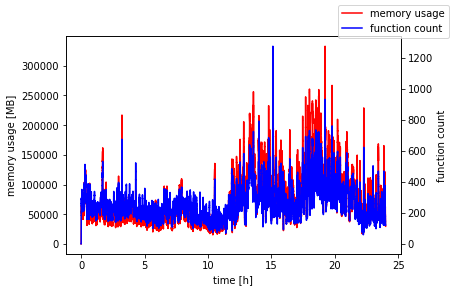

In [3]:
max_time = traces.millisecond.max()
func_cnt = np.zeros(max_time)
memory_usg = np.zeros(max_time)
fig, ax = plt.subplots(1, 1)
for r in traces.iterrows():
    func_cnt[r[1]["millisecond"] : r[1]["millisecond"] + r[1]["runtime"]] += 1
    memory_usg[r[1]["millisecond"] : r[1]["millisecond"] + r[1]["runtime"]] += r[1]["memory"]
ax2 = ax.twinx()
ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], memory_usg, label="memory usage", color="red")
ax2.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], func_cnt, label="function count", color="blue")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory usage [MB]")
ax2.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/3261299004.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


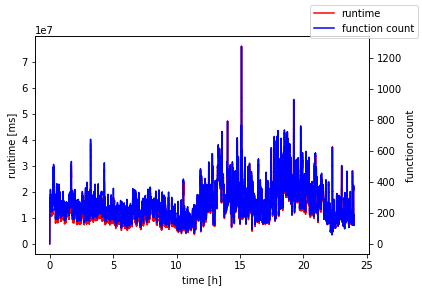

In [4]:
func_cnt = np.zeros(traces["millisecond"].max())
runtime = np.zeros(traces["millisecond"].max())
for r in traces.iterrows():
    func_cnt[r[1]["millisecond"] : r[1]["millisecond"] + r[1]["runtime"]] += 1
    runtime[r[1]["millisecond"] : r[1]["millisecond"] + r[1]["runtime"]] += r[1]["runtime"]
fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], runtime, label="runtime", color="red")
ax2.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], func_cnt, label="function count", color="blue")
ax.set_xlabel("time [h]")
ax.set_ylabel("runtime [ms]")
ax2.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/847444416.py:2: RuntimeWarning: invalid value encountered in divide
  ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], runtime / func_cnt, label="runtime", color="red")
/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/847444416.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


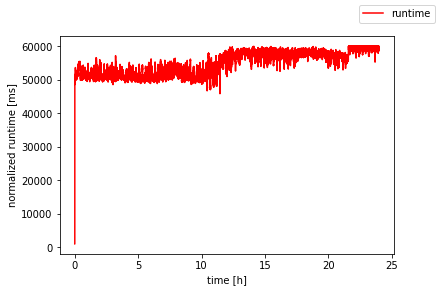

In [5]:
fig, ax = plt.subplots(1, 1)
ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], runtime / func_cnt, label="runtime", color="red")
ax.set_xlabel("time [h]")
ax.set_ylabel("normalized runtime [ms]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/3519106751.py:2: RuntimeWarning: invalid value encountered in divide
  ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], memory_usg / func_cnt, label="memory usage", color="red")
/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/3519106751.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


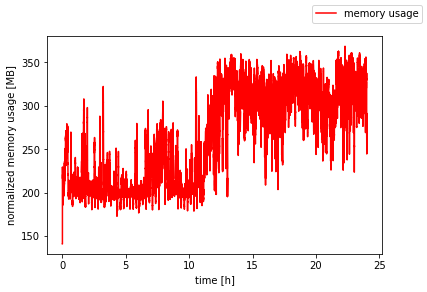

In [6]:
fig, ax = plt.subplots(1, 1)
ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], memory_usg / func_cnt, label="memory usage", color="red")
ax.set_xlabel("time [h]")
ax.set_ylabel("normalized memory usage [MB]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_77189/3267065047.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


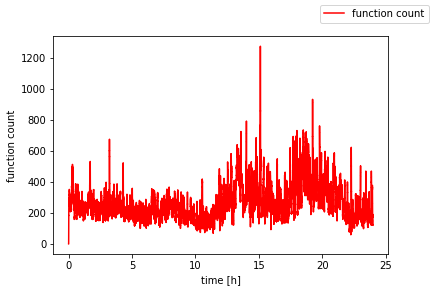

In [7]:
fig, ax = plt.subplots(1, 1)
ax.step([t / (60*60*1000) for t in range(0, traces["millisecond"].max())], func_cnt, label="function count", color="red")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

In [2]:
processed_traces = pd.read_csv("processed.csv")

In [3]:
processed_traces.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86454628,86454628,1,179,283,0.167,0.333
86454629,86454629,1,179,283,0.167,0.333
86454630,86454630,1,179,283,0.167,0.333
86454631,86454631,1,179,283,0.167,0.333
86454632,86454632,1,179,283,0.167,0.333


/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_96034/3483570789.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


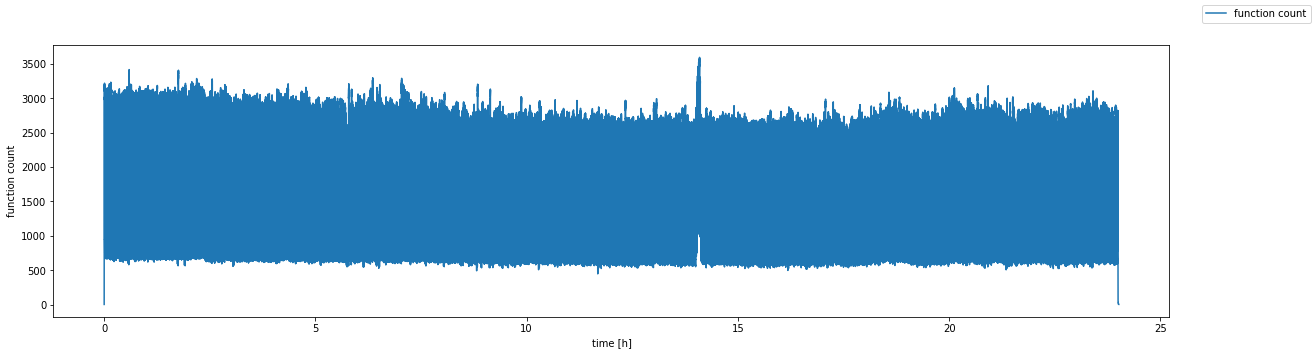

In [3]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["funcCnt"], label="function count")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_96034/4127051920.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


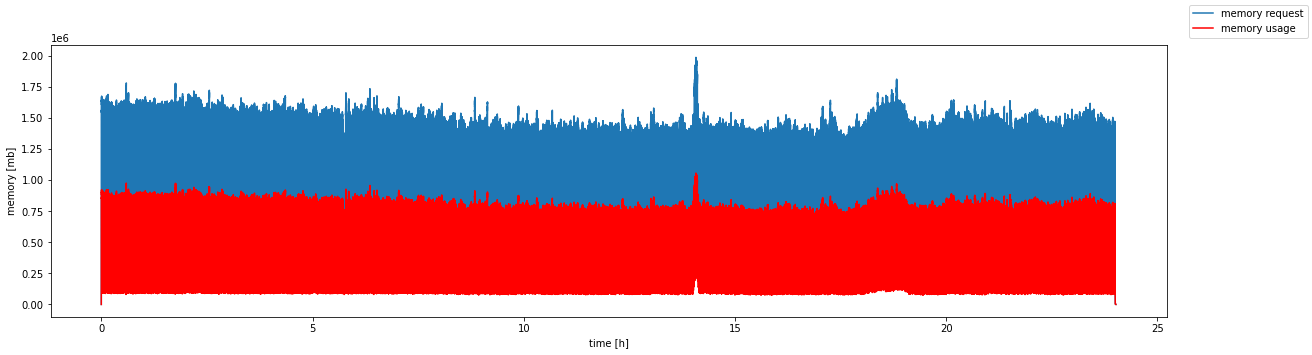

In [4]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["memReq"], label="memory request")
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["memUsg"], label="memory usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_80729/846946803.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


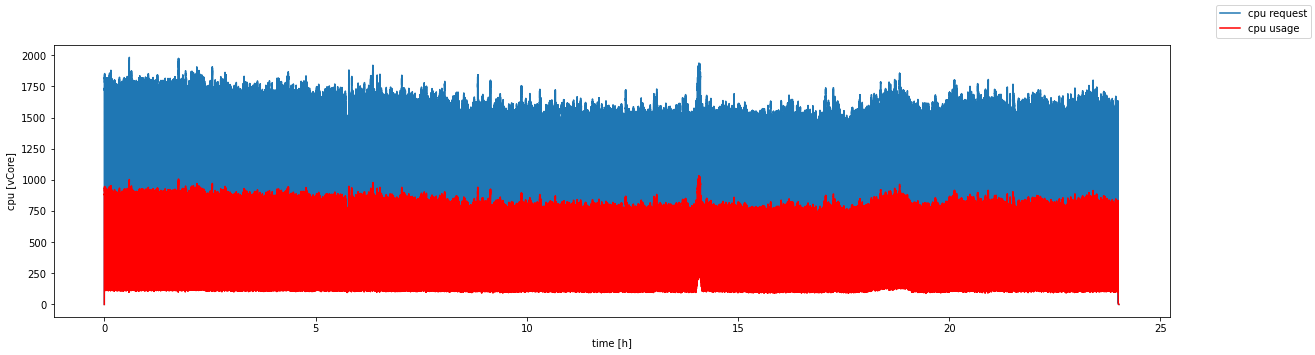

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["cpuReq"], label="cpu request")
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

In [3]:
rolling = processed_traces.rolling(window=60*1000, min_periods=1, center=True).mean()
rolling.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86454628,86439630.0,3.936277,792.915881,1276.503716,0.772191,1.113447
86454629,86439630.5,3.936109,792.878416,1276.439575,0.772161,1.113395
86454630,86439631.0,3.935940,792.840949,1276.375429,0.772131,1.113343
86454631,86439631.5,3.935771,792.803480,1276.311279,0.772101,1.113291
86454632,86439632.0,3.935602,792.766008,1276.247125,0.772072,1.113239


In [4]:
trace_max = processed_traces.rolling(window=60*1000, min_periods=1, center=True).max()
trace_max.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86454628,86454632.0,9.0,1917.0,3201.0,1.667,2.668
86454629,86454632.0,9.0,1917.0,3201.0,1.667,2.668
86454630,86454632.0,9.0,1917.0,3201.0,1.667,2.668
86454631,86454632.0,9.0,1917.0,3201.0,1.667,2.668
86454632,86454632.0,9.0,1917.0,3201.0,1.667,2.668


In [5]:
trace_min = processed_traces.rolling(window=60*1000, min_periods=1, center=True).min()
trace_min.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86454628,86424628.0,1.0,179.0,283.0,0.167,0.333
86454629,86424629.0,1.0,179.0,283.0,0.167,0.333
86454630,86424630.0,1.0,179.0,283.0,0.167,0.333
86454631,86424631.0,1.0,179.0,283.0,0.167,0.333
86454632,86424632.0,1.0,179.0,283.0,0.167,0.333


In [6]:
import matplotlib.colors as colors

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_19555/3440669913.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


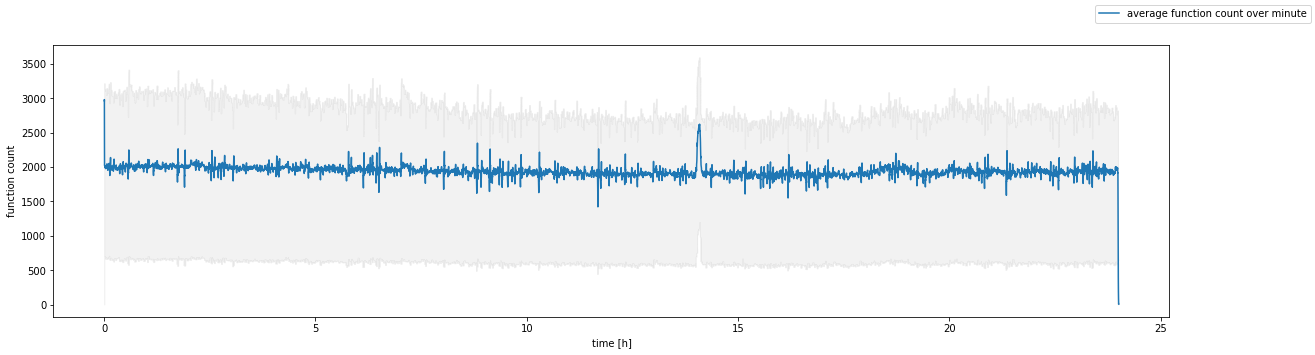

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["funcCnt"], trace_max['funcCnt'], color=colors.to_rgba('gray', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["funcCnt"], label="average function count over minute")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_19555/963913263.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


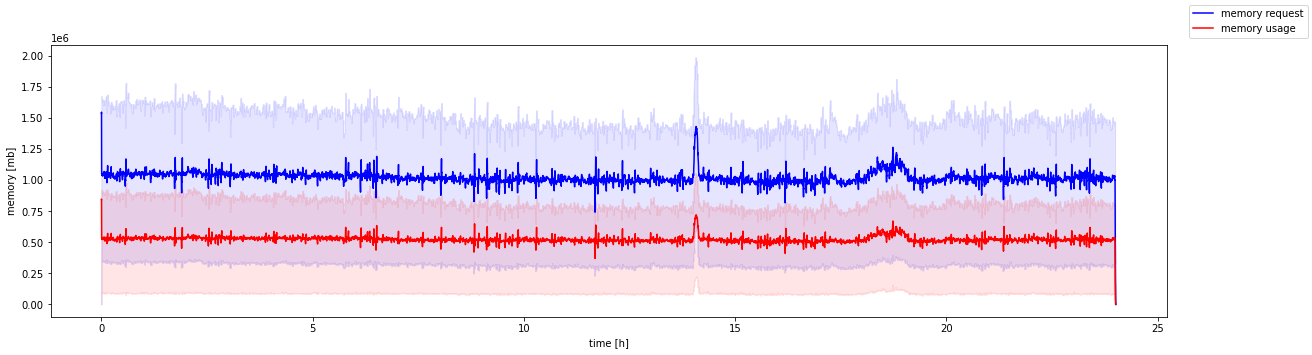

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memReq"], trace_max['memReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memUsg"], trace_max['memUsg'], color=colors.to_rgba('red', 0.1))
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"], label="memory request", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"], label="memory usage", color="red")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_19555/2273722285.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


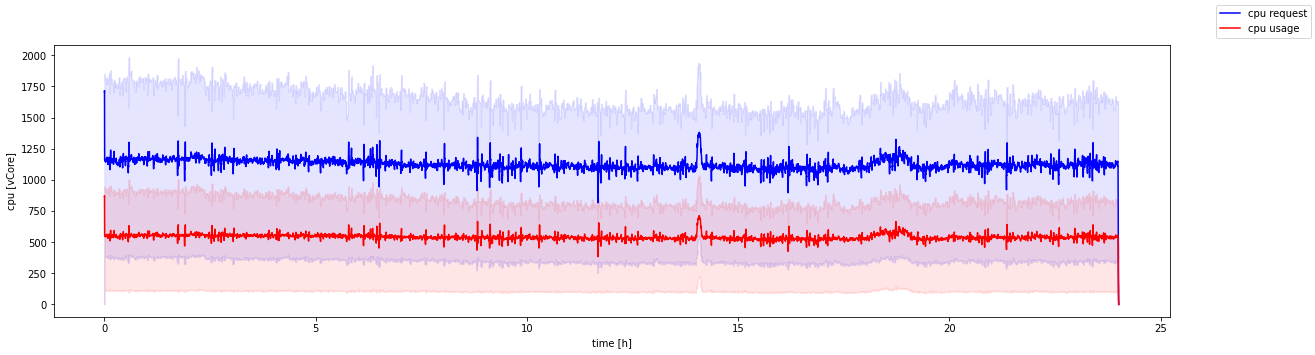

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuReq"], trace_max['cpuReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuUsg"], trace_max['cpuUsg'], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuReq"], label="cpu request", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_24804/2015768400.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


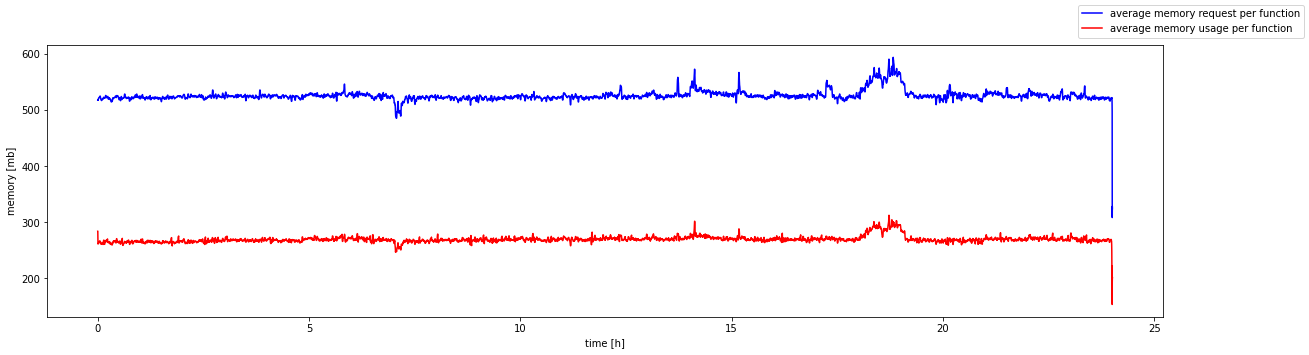

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"] / rolling["funcCnt"], label="average memory request per function", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"] / rolling["funcCnt"], label="average memory usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/2116773518.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


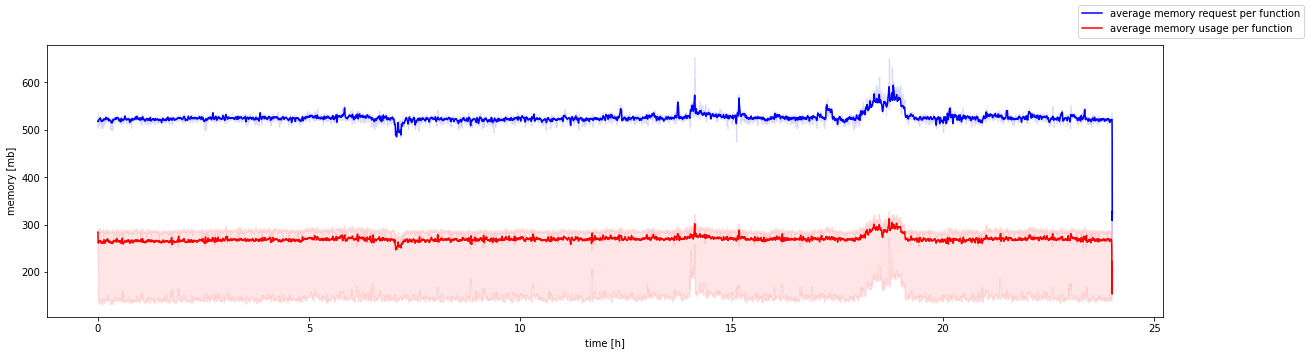

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memReq"] / trace_min["funcCnt"], trace_max['memReq'] / trace_max["funcCnt"], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memUsg"] / trace_min["funcCnt"], trace_max['memUsg'] / trace_max["funcCnt"], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"] / rolling["funcCnt"], label="average memory request per function", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"] / rolling["funcCnt"], label="average memory usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_24804/2972777265.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


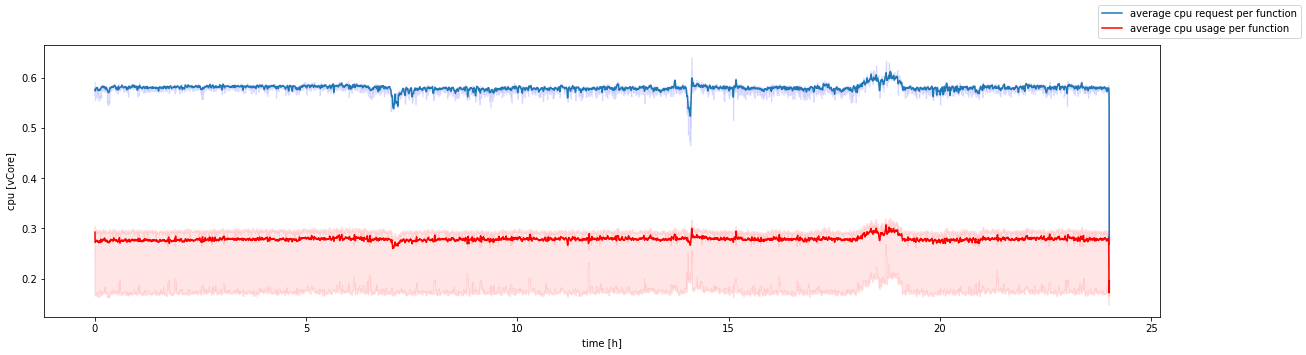

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuReq"] / trace_min["funcCnt"], trace_max['cpuReq'] / trace_max["funcCnt"], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuUsg"] / trace_min["funcCnt"], trace_max['cpuUsg'] / trace_max["funcCnt"], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuReq"] / rolling["funcCnt"], label="average cpu request per function")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"] / rolling["funcCnt"], label="average cpu usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_24804/3392836739.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


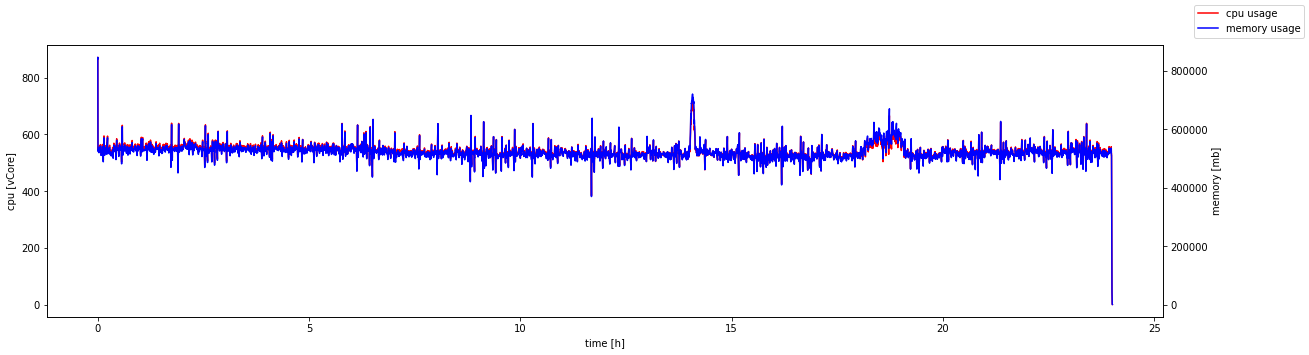

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"], label="cpu usage", color="red")
ax2 = ax.twinx()
ax2.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"], label="memory usage", color="blue")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
ax2.set_ylabel("memory [mb]")
fig.legend()
fig.show()

In [17]:
processed_traces[["funcCnt", "memUsg", "memReq", "cpuUsg", "cpuReq"]].corr(method="spearman")

,funcCnt,memUsg,memReq,cpuUsg,cpuReq
funcCnt,1.000000,0.988562,0.993516,0.992544,0.997578
memUsg,0.988562,1.000000,0.993348,0.998862,0.992018
memReq,0.993516,0.993348,1.000000,0.993767,0.997934
cpuUsg,0.992544,0.998862,0.993767,1.000000,0.994714
cpuReq,0.997578,0.992018,0.997934,0.994714,1.000000


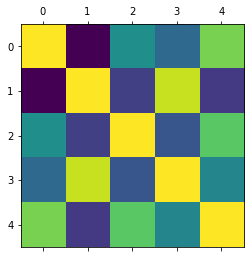

In [9]:
plt.matshow(processed_traces[["funcCnt", "memUsg", "memReq", "cpuUsg", "cpuReq"]].corr())
plt.show()

In [18]:
rand_start = np.random.randint(0, len(processed_traces) - 1)

In [19]:
rand_start

33880490

In [27]:
processed_traces_hour = processed_traces[processed_traces["timestamp"].between(rand_start, rand_start + (60*1000))]
rolling_hour = rolling[rolling["timestamp"].between(rand_start, rand_start + (60*1000))]
trace_min_hour = trace_min[trace_min["timestamp"].between(rand_start, rand_start + (60*1000))]
trace_max_hour = trace_max[trace_max["timestamp"].between(rand_start, rand_start + (60*1000))]

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/2755090146.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


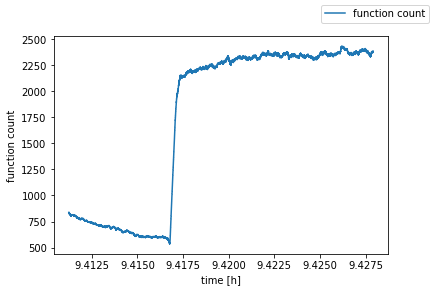

In [33]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["funcCnt"], label="function count")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/1524033194.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


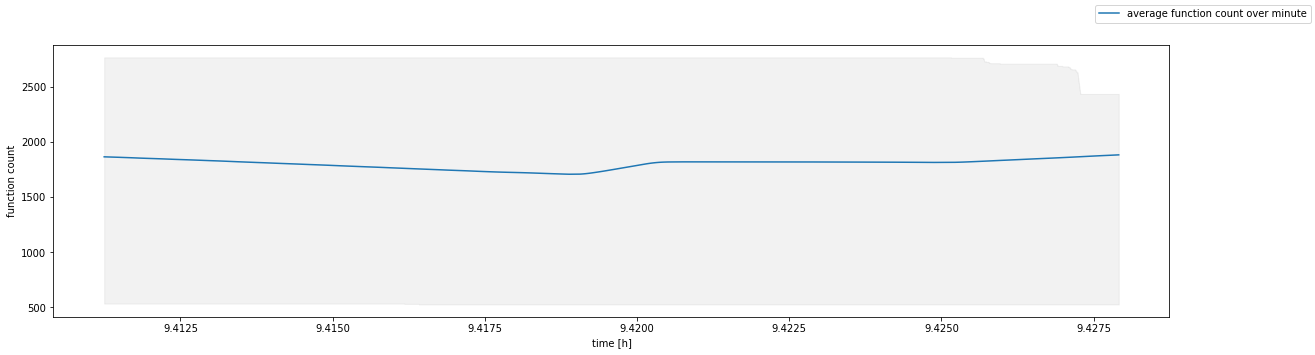

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["funcCnt"], trace_max_hour['funcCnt'], color=colors.to_rgba('gray', 0.1))

ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["funcCnt"], label="average function count over minute")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/3869109677.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


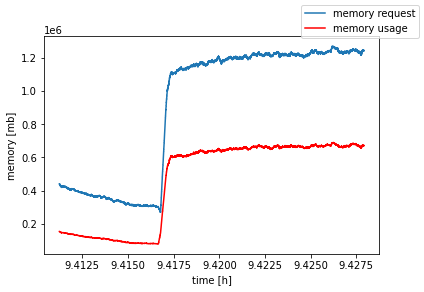

In [34]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["memReq"], label="memory request")
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["memUsg"], label="memory usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/1732472264.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


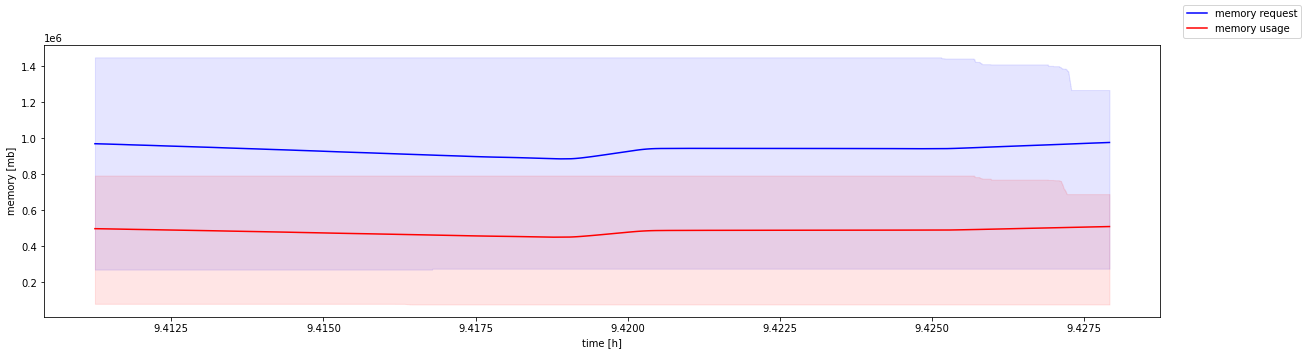

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["memReq"], trace_max_hour['memReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["memUsg"], trace_max_hour['memUsg'], color=colors.to_rgba('red', 0.1))
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["memReq"], label="memory request", color="blue")
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["memUsg"], label="memory usage", color="red")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/2691938859.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


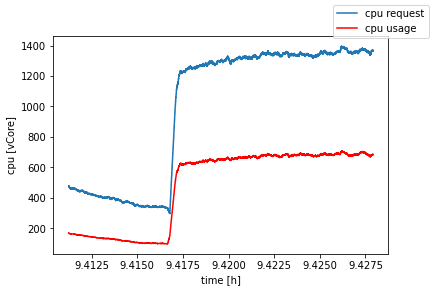

In [35]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["cpuReq"], label="cpu request")
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_36783/2321751599.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


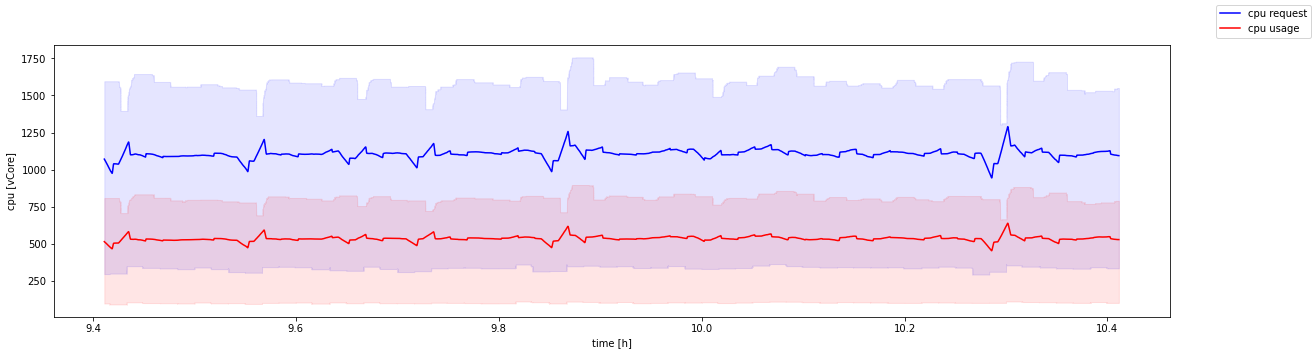

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["cpuReq"], trace_max_hour['cpuReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["cpuUsg"], trace_max_hour['cpuUsg'], color=colors.to_rgba('red', 0.1))

ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["cpuReq"], label="cpu request", color="blue")
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

In [40]:
processed_traces["mem_diff_percentage"] = (processed_traces["memReq"] - processed_traces["memUsg"]) / processed_traces["memReq"]

In [41]:
processed_traces["cpu_diff_percentage"] = (processed_traces["cpuReq"] - processed_traces["cpuUsg"]) / processed_traces["cpuReq"]

In [45]:
processed_traces.mean()

timestamp              4.322732e+07
funcCnt                1.939019e+03
memUsg                 5.229566e+05
memReq                 1.019754e+06
cpuUsg                 5.410954e+02
cpuReq                 1.123637e+03
mem_diff_percentage    5.388250e-01
cpu_diff_percentage    5.580568e-01
dtype: float64